In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Download the Data

In [41]:
cast = pd.read_csv('cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,NaN
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


In [42]:
release_dates = pd.read_csv('release_dates.csv', index_col=None)
release_dates.head()

,title,year,country,date
0,"#73, Shaanthi Nivaasa",2007,India,2007-06-15
1,#Beings,2015,Romania,2015-01-29
2,#Declimax,2018,Netherlands,2018-01-21
3,#Ewankosau saranghaeyo,2015,Philippines,2015-01-21
4,#Horror,2015,USA,2015-11-20


## Count the number of movies with "Christmas" in their title for each month, that is released are the USA.

In [52]:
# First, create a function that extracts the month from the date column
# Then, use the apply.lambda function to create a new column with just the month

def getMonth(m):
    return m.split("-")[1]

release_dates['month'] = release_dates['date'].apply(lambda x: getMonth(x))

# Finally, replace the numeric strings with their corresponding month abbreviation

release_dates.replace(['01', '02', '03', '04',
                       '05', '06', '07', '08',
                       '09', '10', '11', '12'],
                      ['Jan', 'Feb', 'Mar', 'Apr',
                       'May', 'Jun', 'Jul', 'Aug',
                       'Sep', 'Oct', 'Nov', 'Dec'],
                      inplace=True
                     )

In [137]:
# Filter for titles containing the word 'Christmas' AND the country 'USA'.
# Groupby newly created 'month' column, get count and sort values in descending order

release_dates[(release_dates['title'].str.contains('Christmas')) & (release_dates['country'] == 'USA')
             ].groupby('month').count().sort_values('title', ascending=False).title

month
Dec    47
Nov    38
Oct    14
Jan     2
Feb     2
Aug     2
Sep     2
Apr     1
May     1
Jun     1
Jul     1
Mar     0
Name: title, dtype: int64

## Count the number of movies with "Christmas" in their title for each month, that are released in Canada.

In [61]:
# Filter for titles containing 'Christmas' AND the country 'Canada'.
# Groupby newly created 'month' column, get count and sort values in descending order

release_dates[(release_dates['title'].str.contains('Christmas')) & (release_dates['country'] == 'Canada')
             ].groupby('month').count().sort_values('title', ascending=False).title

month
Nov    9
Dec    6
Oct    2
Name: title, dtype: int64

## Count the number of movies in which the titles start with "The Hobbit" for each month, that are released in the USA.

In [79]:
# Filter for titles that start with 'The Hobbit' AND that are released in the 'USA'.
# Groupby 'month' and get the title count.

release_dates[(release_dates['title'].str.startswith('The Hobbit')) & (release_dates['country'] == 'USA')
             ].groupby('month').count().title

month
Dec    3
Name: title, dtype: int64

## Count the number of movies with "Romance" in their title for each day of the week, that are released in the USA.

In [91]:
from datetime import datetime

# First, convert the series to a datetime series

release_dates['date'] = pd.to_datetime(release_dates['date'])

# Create a function that extracts the day of the week from a datetime series

def getDay(d):
    return d.strftime('%A')

# Use apply function and create a new column in pandas dataframe

release_dates['day of week'] = release_dates['date'].apply(lambda x: getDay(x))

In [100]:
# Filter for titles containing 'Romance' AND release country of 'USA'.
# Groupby newly created column 'day of week', get the count and sort values in descending order

release_dates[(release_dates['title'].str.contains('Romance')) & (release_dates['country'] == 'USA')
             ].groupby('day of week').count().sort_values('title', ascending=False).date

day of week
Sunday       32
Monday       21
Friday       18
Wednesday    11
Saturday      8
Thursday      6
Tuesday       4
Name: date, dtype: int64

## Count the number of movies with "Action" in their title for each day of the week, that are released in the USA.

In [103]:
# Filter for films containing the word 'Action' AND the country 'USA'.
# Group by 'day of week' column, get total title count.

release_dates[(release_dates['title'].str.contains('Action')) & (release_dates['country'] == 'USA')
             ].groupby('day of week').count().title

day of week
Friday       19
Monday        2
Saturday      2
Sunday        3
Thursday      1
Tuesday       1
Wednesday     3
Name: title, dtype: int64

## On which date was each Judi Dench movie from the 1990s released in the USA?

In [123]:
# First, merge the two dataframes on their shared columns 'title' & 'year

new_df = pd.merge(release_dates, cast, how='inner', on=['title', 'year'])

In [125]:
# Filter for 'Judi Dench' AND all years greater than or equal to 1990 and less than 2000.
# AND for country = 'USA'. 

new_df[(new_df['name'] == 'Judi Dench') 
       & ((new_df['year'] >= 1990) & (new_df['year'] < 2000)) 
       & (new_df['country'] == 'USA')
      ][['title', 'year', 'day of week']]

,title,year,day of week
5410286,GoldenEye,1995,Friday
5706049,Hamlet,1996,Wednesday
6926117,Jack & Sarah,1995,Friday
9431245,Mrs Brown,1997,Friday
12061910,Shakespeare in Love,1998,Friday
13371384,Tea with Mussolini,1999,Friday
16749874,The World Is Not Enough,1999,Friday
17024908,Tomorrow Never Dies,1997,Friday


## In which months do films with the actress Judi Dench tend to be released in the USA?

In [149]:
months = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
          "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

<AxesSubplot: xlabel='month'>

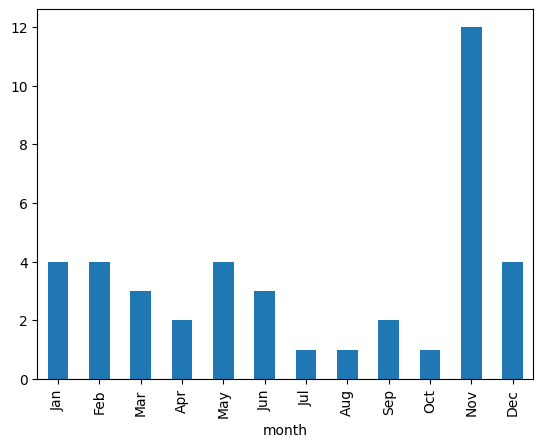

In [154]:
# Filter for name 'Judi Dench' AND country 'USA'. Groupby 'month' column.
# Get the counts, select the title column, reindex with the months list to get the
# correct ordering of months.  Plot for visualization.

new_df[(new_df['name'] == 'Judi Dench') & (new_df['country'] == 'USA')
      ].groupby('month').count().title.reindex(months, axis=0).plot(kind='bar')

## In which months do films with the actor Tom Cruise tend to be released in the USA?

<AxesSubplot: xlabel='month'>

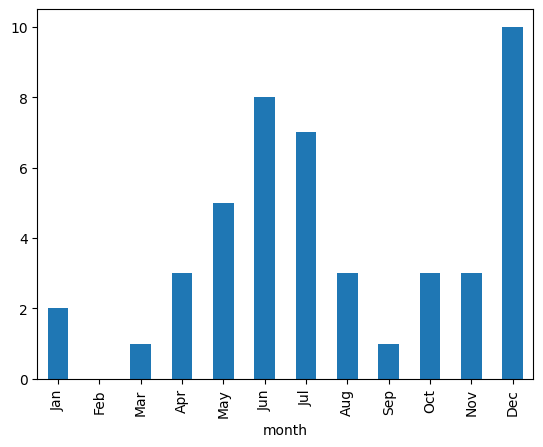

In [155]:
# Filter for name 'Tom Cruise' AND country 'USA'. Groupby 'month' column.
# Get the counts, select the title column, reindex with the months list to get the
# correct ordering of months.  Plot for visualization.

new_df[(new_df['name'] == 'Tom Cruise') & (new_df['country'] == 'USA')
      ].groupby('month').count().title.reindex(months, axis=0).plot(kind='bar')